In [1]:
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [5]:
import pandas as pd
import numpy as np

In [9]:
import os
os.getcwd()

'/home/sangmin/cft/dtree'

In [97]:
import pydotplus

In [12]:
tennis_data = pd.read_csv('play_tennis.csv')
tennis_data

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [30]:
outlook = list(tennis_data.outlook)
temp = list(tennis_data.temp)
humidity = list(tennis_data.humidity)
wind = list(tennis_data.wind)
play = list(tennis_data.play)

In [41]:
data = { 'outlook' : outlook,
        'temp' : temp,
        'humidity' : humidity,
        'wind' : wind,
        'play' : play}

In [42]:
df = pd.DataFrame(data)

In [43]:
df

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [52]:
df.outlook = df.outlook.replace('Sunny', 0)
df.outlook = df.outlook.replace('Overcast', 1)
df.outlook = df.outlook.replace('Rain', 2)

df.temp = df.temp.replace('Hot', 3)
df.temp = df.temp.replace('Mild', 4)
df.temp = df.temp.replace('Cool', 5)

df.humidity = df.humidity.replace('High', 6)
df.humidity = df.humidity.replace('Normal', 7)

df.wind = df.wind.replace('Strong', 8)
df.wind = df.wind.replace('Weak', 9)

df.play = df.play.replace('No', 10)
df.play = df.play.replace('Yes', 11)

In [53]:
df

,outlook,temp,humidity,wind,play
0,0,3,6,9,10
1,0,3,6,8,10
2,1,3,6,9,11
3,2,4,6,9,11
4,2,5,7,9,11
5,2,5,7,8,10
6,1,5,7,8,11
7,0,4,6,9,10
8,0,5,7,9,11
9,2,4,7,9,11


In [70]:
X = np.array(pd.DataFrame(tennis_data, columns=['outlook','temp', 'humidity', 'wind']))

In [71]:
X[:2]

array([['Sunny', 'Hot', 'High', 'Weak'],
       ['Sunny', 'Hot', 'High', 'Strong']], dtype=object)

In [72]:
y = np.array(pd.DataFrame(tennis_data, columns=['play']))

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [74]:
X_train[:2], y_train[:2]

(array([['Rain', 'Mild', 'High', 'Strong'],
        ['Overcast', 'Cool', 'Normal', 'Strong']], dtype=object),
 array([['No'],
        ['Yes']], dtype=object))

In [63]:
X_test[:2], y_test[:2]

(array([['Overcast', 'Hot', 'Normal', nan],
        ['Rain', 'Mild', 'High', nan]], dtype=object),
 array([['Yes'],
        ['Yes']], dtype=object))

In [75]:
X = np.array(pd.DataFrame(df, columns=['outlook','temp', 'humidity', 'wind']))

In [76]:
y = np.array(pd.DataFrame(tennis_data, columns=['play']))

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [78]:
X_train

array([[2, 4, 7, 9],
       [2, 5, 7, 8],
       [2, 4, 6, 8],
       [0, 4, 6, 9],
       [0, 5, 7, 9],
       [1, 3, 7, 9],
       [0, 3, 6, 8],
       [0, 4, 7, 8],
       [0, 3, 6, 9],
       [2, 5, 7, 9]])

<h2>decision tree<h2>

In [81]:
dt_clf = DecisionTreeClassifier()

In [82]:
dt_clf = dt_clf.fit(X_train, y_train)

In [83]:
dt_prediction = dt_clf.predict(X_test)

<h2>visuallization<h2>

In [85]:
feature_names = tennis_data.columns.tolist()

In [86]:
feature_names = feature_names[0:4]

In [87]:
target_name = np.array(['Play No', 'Play Yes'])

In [88]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)

In [98]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

In [99]:
from IPython.display import Image

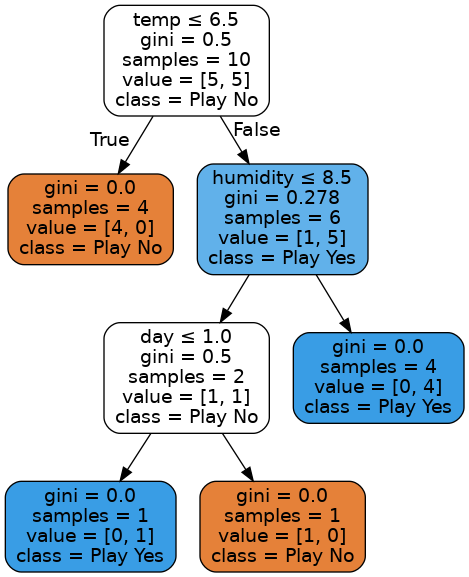

In [100]:
Image(dt_graph.create_png())